C:\Users\kelvi\AppData\Local\Temp\ipykernel_20540\1507289956.py:15: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_fifa/players_22.csv')


   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  .

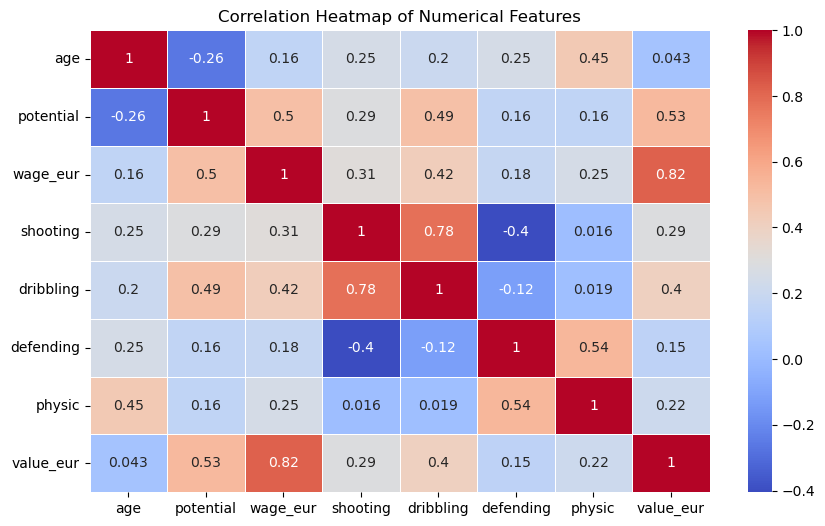

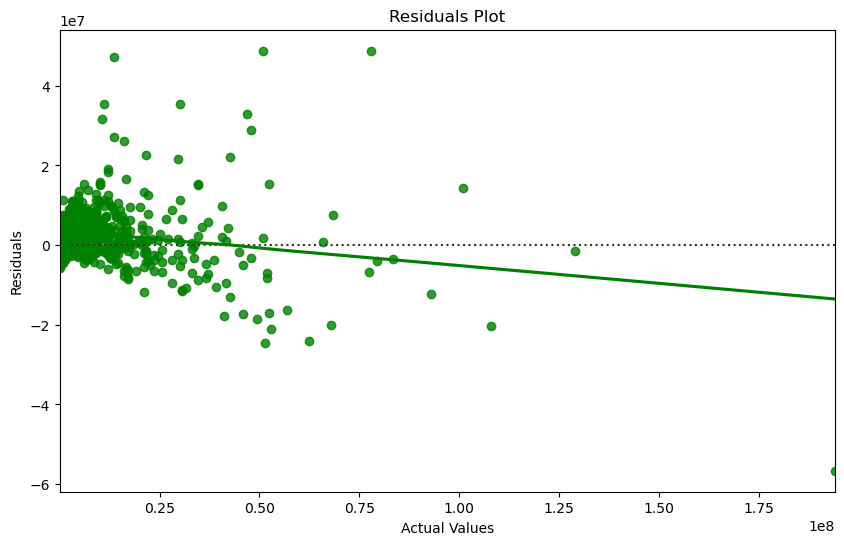

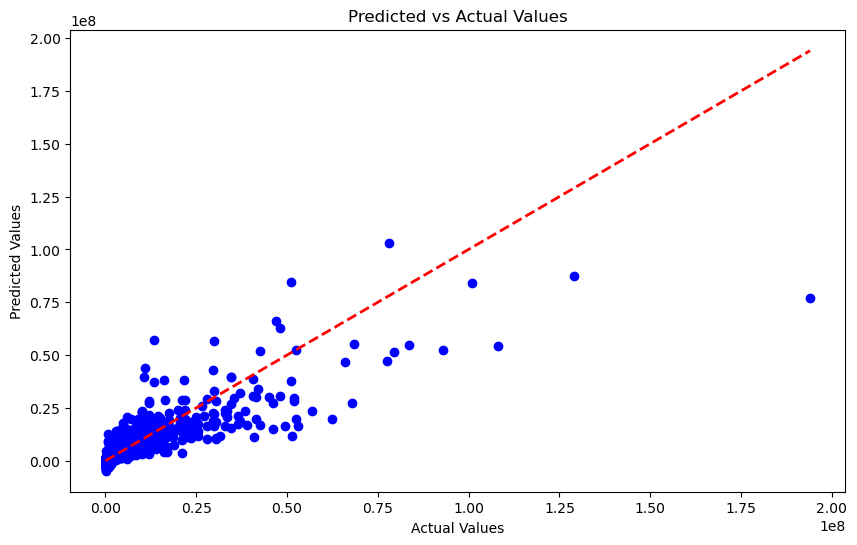

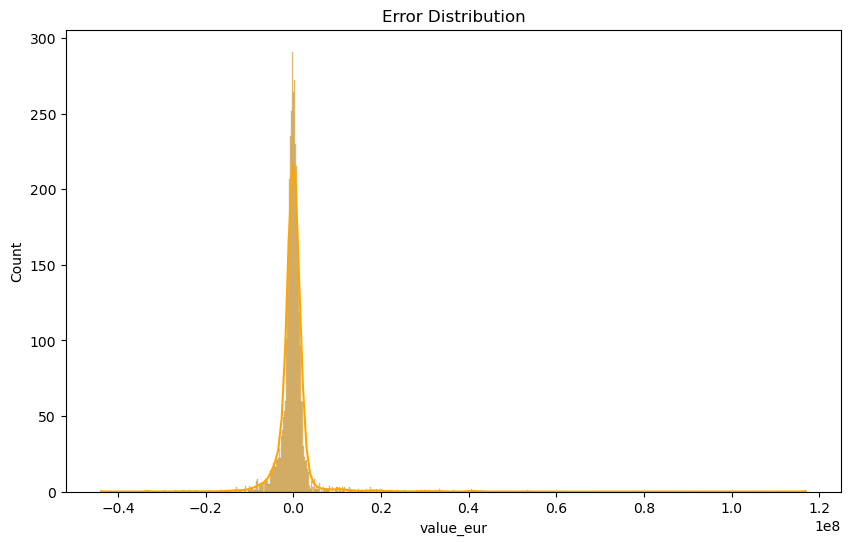

Predicted Market Value: 34143223.11 EUR


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# Load the dataset
df = pd.read_csv('dataset_fifa/players_22.csv')

# Basic data exploration
print(df.head())  # Display first few rows
print(df.info())  # Check for missing values and datatypes
print(df.describe())  # Statistical summary of numerical columns

# Features and target variable
features = ['age', 'potential', 'wage_eur', 'shooting', 'dribbling', 'defending', 'physic', 'club_name', 'league_name']
target = 'value_eur'

# Prepare features and target
X = df[features]
y = df[target]

# Handle missing values in the target variable
if y.isnull().any():
    print("Missing values found in target variable. Removing rows with missing target values.")
    df = df.dropna(subset=[target])
    X = df[features]
    y = df[target]

# Handle missing values in features
numerical_features = ['age', 'potential', 'wage_eur', 'shooting', 'dribbling', 'defending', 'physic']
categorical_features = ['club_name', 'league_name']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline with preprocessing and regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# ---------------------- Visualization Section ----------------------

# 1. Feature Correlation Heatmap (for numerical features)
plt.figure(figsize=(10, 6))
corr_matrix = df[numerical_features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 2. Residuals Plot 
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color="g")
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

# 3. Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle='--', lw=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 4. Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True, color="orange")
plt.title('Error Distribution')
plt.show()

# ------------------- Feature Selection using Recursive Feature Elimination (RFE) -------------------

# # Perform RFE to identify the most important features
# rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
# rfe.fit(X_train, y_train)

# # Get ranking of features
# rfe_ranking = pd.Series(rfe.ranking_, index=numerical_features + categorical_features).sort_values()
# print("Feature Ranking from RFE:\n", rfe_ranking)

# Example: Predict Market Value for a New Player
new_player_data = {
    'age': [25],
    'potential': [85],
    'wage_eur': [100000],
    'shooting': [80],
    'dribbling': [78],
    'defending': [70],
    'physic': [75],
    'club_name': ['Manchester United'],
    'league_name': ['Premier League']
}

# Create DataFrame for new player data
new_player_df = pd.DataFrame(new_player_data)

# Predict market value
predicted_value = model.predict(new_player_df)
print(f'Predicted Market Value: {predicted_value[0]:.2f} EUR')


In [15]:
import joblib
model_filename = 'marketvaluemodel.pkl'
joblib.dump(model, model_filename)

['marketvaluemodel.pkl']